### Import libraries

In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load files

In [429]:
cn = pd.read_csv("files/channel.csv", header=None)
cn = cn.to_numpy().reshape(len(cn))
cn = np.pad(cn, (0, 1024-len(cn)), mode='constant', constant_values=0)

df1 = pd.read_csv("files/file6.csv", header=None)
df1 = df1.to_numpy()

In [430]:
df1.shape

(291456, 1)

### Useful functions

In [431]:
def remove_cyclic_prefix(nparr):
    ofdm_sym = nparr.reshape(-1, 1056)
    ofdm_sym = ofdm_sym[:, 32:]
    return ofdm_sym

### Main code

In [432]:
x = np.arange(1024)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


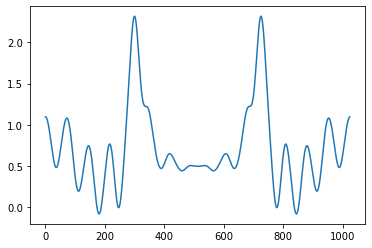

In [433]:
fft_channel = np.fft.fft(cn)
plt.plot(x, fft_channel)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


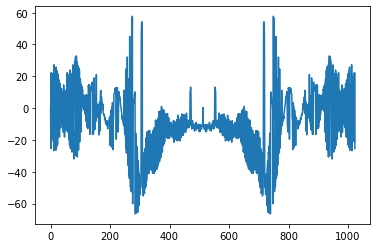

In [434]:
blocks = remove_cyclic_prefix(df1)
fft_blocks = np.fft.fft(blocks)
plt.plot(x, fft_blocks[0])

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


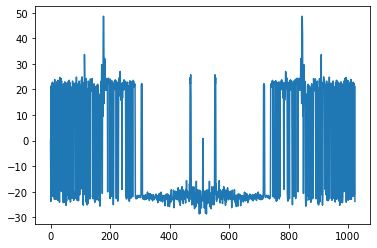

In [435]:
fft_signal = fft_blocks/fft_channel
plt.plot(x, fft_signal[0])

In [436]:
fft_signal[0]

array([  0.26105202 +0.j        , -23.77599777+22.99623583j,
        21.39532486-21.6954774j , ..., -21.19609729-21.82329418j,
        21.39532486+21.6954774j , -23.77599777-22.99623583j])

In [437]:
fft_info = fft_signal[:, 1:512]
fft_info.shape

(276, 511)

In [438]:
def min_distance_decoding(c):
    a, b = c.real, c.imag
    if a>=0:
        return "00" if b>=0 else "10"
    else:
        return "01" if b>=0 else "11"

In [439]:
decoded = np.vectorize(min_distance_decoding)(fft_info)

In [440]:
decoded_list = decoded.flatten()
decoded_str = "".join(decoded_list)

In [441]:
with open("Output.txt", "w") as text_file:
    text_file.write(decoded_str)

In [442]:
binary_string = decoded_str
binary_list = [int(binary_string[i:i+8], 2) for i in range(0, len(binary_string), 8)]
print(binary_list)

[102, 105, 108, 101, 115, 47, 54, 56, 56, 52, 54, 52, 51, 50, 48, 49, 46, 119, 97, 118, 0, 51, 53, 50, 48, 50, 0, 82, 73, 70, 70, 122, 137, 0, 0, 87, 65, 86, 69, 102, 109, 116, 32, 16, 0, 0, 0, 1, 0, 1, 0, 64, 31, 0, 0, 64, 31, 0, 0, 1, 0, 8, 0, 100, 97, 116, 97, 85, 137, 0, 0, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 128, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 1

In [443]:
[chr(x) for x in binary_list]


['f',
 'i',
 'l',
 'e',
 's',
 '/',
 '6',
 '8',
 '8',
 '4',
 '6',
 '4',
 '3',
 '2',
 '0',
 '1',
 '.',
 'w',
 'a',
 'v',
 '\x00',
 '3',
 '5',
 '2',
 '0',
 '2',
 '\x00',
 'R',
 'I',
 'F',
 'F',
 'z',
 '\x89',
 '\x00',
 '\x00',
 'W',
 'A',
 'V',
 'E',
 'f',
 'm',
 't',
 ' ',
 '\x10',
 '\x00',
 '\x00',
 '\x00',
 '\x01',
 '\x00',
 '\x01',
 '\x00',
 '@',
 '\x1f',
 '\x00',
 '\x00',
 '@',
 '\x1f',
 '\x00',
 '\x00',
 '\x01',
 '\x00',
 '\x08',
 '\x00',
 'd',
 'a',
 't',
 'a',
 'U',
 '\x89',
 '\x00',
 '\x00',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x80',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x80',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 '\x7f',
 

In [444]:
binary_l = [int(binary_string[i]) for i in range (0,50000)]
print(binary_l)

[0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 

In [445]:
print(decoded_str)
decoded_str= decoded_str[216:]

def string_to_array(string):
    return [int(char) for char in string]

decoded_arr = string_to_array(decoded_str)
print(decoded_arr)  # Output: [1, 0, 1, 0, 1, 0]

file_path = "array_data2.bin"

# Save array to binary file
with open(file_path, "w") as text_file:
    text_file.write(decoded_str)

0110011001101001011011000110010101110011001011110011011000111000001110000011010000110110001101000011001100110010001100000011000100101110011101110110000101110110000000000011001100110101001100100011000000110010000000000101001001001001010001100100011001111010100010010000000000000000010101110100000101010110010001010110011001101101011101000010000000010000000000000000000000000000000000010000000000000001000000000100000000011111000000000000000001000000000111110000000000000000000000010000000000001000000000000110010001100001011101000110000101010101100010010000000000000000011111110111111101111111011111110111111110000000011111110111111101111111011111110111111101111111011111110111111101111111011111110111111101111111011111110111111101111111011111110111111101111111011111110111111101111111011111110111111101111111011111110111111101111111011111110111111101111111011111110111111101111111011111110111111101111111011111110111111101111111011111111000000001111111011111110111111101111111011111110111111101111111

In [446]:
import wave

def bin_to_wav(bin_file, wav_file, sample_width, sample_rate, channels):
    with open(bin_file, 'rb') as f:
        data = f.read()

    # Assuming the data in the binary file is in little-endian format
    audio_data = np.frombuffer(data, dtype=np.int16)

    # Reshape the data according to the number of channels
    audio_data = audio_data.reshape((-1, channels))

    with wave.open(wav_file, 'wb') as wf:
        wf.setnchannels(channels)
        wf.setsampwidth(sample_width)
        wf.setframerate(sample_rate)
        wf.writeframes(audio_data.tobytes())

# Example usage
bin_file = 'raw2.bin'
wav_file = 'output2.wav'
sample_width = 2  # in bytes (16-bit)
sample_rate = 44100 # in Hz
channels = 1  # stereo

bin_to_wav(bin_file, wav_file, sample_width, sample_rate, channels)